In [27]:
import pandas as pd
from ast import literal_eval
from dython import nominal
import matplotlib.pyplot as plt
import seaborn as sns
from bidi.algorithm import get_display
from arabic_reshaper import reshape
import numpy as np
import pickle
import warnings
import pickle
import matplotlib

import matplotlib.pyplot as plt
import matplotlib.animation as animation
warnings.simplefilter(action='ignore', category=pd.errors.PerformanceWarning)
from matplotlib.animation import FuncAnimation

In [28]:
df = pd.read_csv("final.csv")

In [29]:
df

,شهر,رتبه کشوری,رتبه در منطقه,منطقه,سابقه کانونی,میانگین تراز کانون,تعداد آزمون,رشته قبولی,دانشگاه قبولی,رشته مدرسه,سال
0,تهران,1,1.0,منطقه 1,3,7738,72.0,مهندسي کامپيوتر,دانشگاه صنعتي شريف - تهران,ریاضی,1400
1,رفسنجان,2,1.0,منطقه 2,6,7857,120.0,مهندسي کامپيوتر,دانشگاه صنعتي شريف - تهران,ریاضی,1400
2,اراك,3,2.0,منطقه 2,7,7589,142.0,مهندسي کامپيوتر,دانشگاه صنعتي شريف - تهران,ریاضی,1400
3,اراك,5,4.0,منطقه 2,3,7529,79.0,مهندسي کامپيوتر,دانشگاه صنعتي شريف - تهران,ریاضی,1400
4,مشهد,6,2.0,منطقه 1,1,7645,23.0,مهندسي کامپيوتر,دانشگاه صنعتي شريف - تهران,ریاضی,1400
...,...,...,...,...,...,...,...,...,...,...,...
73833,كنگاور,3565,990.0,منطقه 3,2,6200,69.0,دندانپزشکي,دانشگاه علوم پزشکي ايلام,تجربی,1400
73834,رباط كريم,3586,995.0,منطقه 3,7,5952,150.0,پزشکي - بورسيه وزارت دفاع,دانشگاه علوم پزشکي ارتش جمهوري اسلامي ايران,تجربی,1400
73835,اشنويه,3596,999.0,منطقه 3,3,6666,64.0,پزشکي - نيمسال دوم,دانشگاه علوم پزشکي اروميه,تجربی,1400
73836,گنبد,3596,999.0,منطقه 3,3,6474,60.0,پزشکي,دانشگاه علوم پزشکي بابل,تجربی,1400


In [30]:
with open("dic_toprov","rb") as f:
    dic = pickle.load(f)

In [31]:
alt_dic = {
    "یاسوج":"کهگیلویه و بویراحمد",
    "گنبد":"گلستان",
    "اسلام شهر":"تهران",
    "قائن":"خراسان جنوبی",
    "شهر قدس":"تهران",
    "هشتگرد":"البرز",
    "دهدشت":"کهگیلویه و بویراحمد",
    "برازجان":"بوشهر",
    "نورآباد ممسنی":"فارس",
    "مشکین شهر":"اردبیل",
    "ماه شهر":"خوزستان",
    "پارس آباد مغان":"اردبیل",
    "بندر دیر":"بوشهر",
    "شاهین شهر":"اصفهان",
    "در گز":"خراسان رضوی",
    "آشخانه":"خراسان شمالی",
    "اسلام آبادغرب":"کرمانشاه",
    "نورآباد":"لرستان",
    "امیرکلا":"مازندران",
    "شوش دانیال":"خوزستان",
    "خورموج":"بوشهر",
    "قره ضیاءالدین":"آذربایجان غربی",
    "تیران":"اصفهان",
    "بندرترکمن":"گلستان",
    "فریدون کنار":"مازندران",
    "محمدیه":"قزوین",
    "تهرانسر":"تهران",
    "علی آبادکتول":"گلستان",
    "ایوان غرب":"ایلام",
    "شازنداراک":"مرکزی",
    "فیض آبادتربت حیدریه":"خراسان رضوی",
    "الشتر":"لرستان",
    "فولاد شهر":"اصفهان"
}

In [32]:
with open("dic_population","rb") as f:
    dic_population = pickle.load(f)

In [33]:
df1 = df.copy()

In [34]:
for key in dic.keys():
    key = key.replace("\u200c"," ").replace("ك","").replace("ي","ی")

In [35]:
df1["شهر"] = df1["شهر"].apply(lambda x: x.replace("\u200c"," ").strip())
df1["شهر"] = df1["شهر"].apply(lambda x: x.replace("ك","ک").replace("ي","ی"))

In [36]:
dic_final = dict(dic.items()|alt_dic.items())

In [37]:
df1["استان"] = df1["شهر"].apply(lambda x: dic_final[x].strip().replace("\u200c"," ") if x in dic_final.keys() else None)

In [38]:
df1 = df1.dropna()
df1 = df1.reset_index(drop=True)

In [39]:
df3 = df1.copy()

In [40]:
df3 = df3[df3["رتبه کشوری"]<1000]
df3 = df3.reset_index(drop=True)

In [41]:
df3.head()

,شهر,رتبه کشوری,رتبه در منطقه,منطقه,سابقه کانونی,میانگین تراز کانون,تعداد آزمون,رشته قبولی,دانشگاه قبولی,رشته مدرسه,سال,استان
0,تهران,1,1.0,منطقه 1,3,7738,72.0,مهندسي کامپيوتر,دانشگاه صنعتي شريف - تهران,ریاضی,1400,تهران
1,رفسنجان,2,1.0,منطقه 2,6,7857,120.0,مهندسي کامپيوتر,دانشگاه صنعتي شريف - تهران,ریاضی,1400,کرمان
2,اراک,3,2.0,منطقه 2,7,7589,142.0,مهندسي کامپيوتر,دانشگاه صنعتي شريف - تهران,ریاضی,1400,مرکزی
3,اراک,5,4.0,منطقه 2,3,7529,79.0,مهندسي کامپيوتر,دانشگاه صنعتي شريف - تهران,ریاضی,1400,مرکزی
4,مشهد,6,2.0,منطقه 1,1,7645,23.0,مهندسي کامپيوتر,دانشگاه صنعتي شريف - تهران,ریاضی,1400,خراسان رضوی


In [42]:
dic_regions = {
  "Alborz":"البرز",
  "Ardabil":"اردبیل",
  "Bushehr":"بوشهر",
  "Chahar Mahaal and Bakhtiari":"چهارمحال و بختیاری",
  "East Azarbaijan":"آذربایجان شرقی",
  "Isfahan":"اصفهان",
  "Fars":"فارس",
  "Gilan":"گیلان",
  "Golestan":"گلستان",
  "Hamedan":"همدان",
  "Hormozgan":"هرمزگان",
  "Ilam":"ایلام",
  "Kerman":"کرمان",
  "Kermanshah":"کرمانشاه",
  "North Khorasan":"خراسان شمالی",
  "Razavi Khorasan":"خراسان رضوی",
  "South Khorasan":"خراسان جنوبی",
  "Khuzestan":"خوزستان",
  "Kohgiluyeh and Boyer-Ahmad":"کهگیلویه و بویراحمد",
  "Kurdistan":"کردستان",
  "Lorestan":"لرستان",
  "Markazi":"مرکزی",
  "Mazandaran":"مازندران",
  "Qazvin":"قزوین",
  "Qom":"قم",
  "Semnan":"سمنان",
  "Sistan and Baluchistan":"سیستان و بلوچستان",
  "Tehran":"تهران",
  "West Azarbaijan":"آذربایجان غربی",
  "Yazd":"یزد",
  "Zanjan":"زنجان"
}
dic_regions = {v: k for k, v in dic_regions.items()}
#df3["استان"] = df3["استان"].apply(lambda x: dic_regions[x])

In [43]:
# Make a plot based on provinces performance regarding to this decade
for_plot = pd.DataFrame()

# Preparing a dataframe for ease of usage in plots
for i in range(1391,1401):
    sample = df3[df3["سال"]==i]
    grouped = sample[["استان","رتبه کشوری","سال"]].groupby(["استان","سال"]).count()
    grouped = grouped.reset_index()
    for_plot["استان"] = grouped["استان"]
    for_plot[str(i)] = grouped["رتبه کشوری"]
cols = [str(col) for col in range(1391,1401)]
for index in range(31):
    for col in cols:
        for_plot.at[index,col] = (for_plot.at[index,col]*7800/dic_population[for_plot.at[index,"استان"]])
#for_plot["استان"] = for_plot["استان"].apply(lambda x: dic_regions[x])
for_plot["استان"] = for_plot["استان"].apply(lambda x: get_display(reshape(x)))

In [44]:
#Lets take a average for this years and then, delete them
cols = [str(col) for col in range(1391,1401)]
for_sum = for_plot.loc[: , cols]
for_plot["Sum"] = for_sum.sum(axis=1)
for_plot["Sum"] = for_plot["Sum"]/10
for_plot = for_plot.sort_values(by=["Sum"],ascending=False)
del for_plot["Sum"]

In [19]:
#LINE ON TABLE
'''
# make sample data
cols = [str(col) for col in range(1391,1401)]
for_line = for_plot.rename(columns={"استان":"Province"})


for index in range(31):
    for col in cols:
        for_line.at[index,col] = (for_line.at[index,col]*7800/dic_population[for_line.at[index,"Province"]])
first = for_line[0:30:2].copy()
second = for_line[1:30:2].copy()

for_line["Province"] = for_line["Province"].apply(lambda x: get_display(reshape(x)))
first["Province"] = first["Province"].apply(lambda x: get_display(reshape(x)))
second["Province"] = second["Province"].apply(lambda x: get_display(reshape(x)))

for_line = for_line.set_index(["Province"])
first = first.set_index(["Province"])
second = second.set_index(["Province"])

fig, ax = plt.subplots(figsize=(15,15))
ax.set_axis_off()
### plot data as table
plt.matplotlib.table.table(ax, for_line.applymap('{:.2f}'.format).values.tolist(), rowLabels=for_line.index, bbox=[0,0,1,1])
cols = [col+"h"for col in cols]
### plot curve over table
ymax = for_line.max().max()
ymax_first = first.max().max()
ymax_second = second.max().max()
ax.set_ylim(0, ymax * len(for_line))
#ax.plot((first.to_numpy() + ((len(for_line) - 1 - first.reset_index(drop=True).index.to_numpy()) * ymax)[:,None]).T, color='green')
#ax.plot((first.to_numpy() + ((len(for_line) - 1 - first.reset_index(drop=True).index.to_numpy()) * ymax)[:,None]).T, color='green')
#ax.plot((second.to_numpy() + ((len(second) - 1 - second.reset_index(drop=True).index.to_numpy()) * ymax)[:, None]).T, color='blue')
ax.plot((for_line.to_numpy() + ((len(for_line) - 1 - for_line.reset_index(drop=True).index.to_numpy()) * ymax)[:,None]).T, color='C3')
plt.show()
#first
#print(["gray"*100])
fig.savefig("exports/line_table.png",bbox_inches='tight',dpi=300)
'''

'\n# make sample data\ncols = [str(col) for col in range(1391,1401)]\nfor_line = for_plot.rename(columns={"استان":"Province"})\n\n\nfor index in range(31):\n    for col in cols:\n        for_line.at[index,col] = (for_line.at[index,col]*7800/dic_population[for_line.at[index,"Province"]])\nfirst = for_line[0:30:2].copy()\nsecond = for_line[1:30:2].copy()\n\nfor_line["Province"] = for_line["Province"].apply(lambda x: get_display(reshape(x)))\nfirst["Province"] = first["Province"].apply(lambda x: get_display(reshape(x)))\nsecond["Province"] = second["Province"].apply(lambda x: get_display(reshape(x)))\n\nfor_line = for_line.set_index(["Province"])\nfirst = first.set_index(["Province"])\nsecond = second.set_index(["Province"])\n\nfig, ax = plt.subplots(figsize=(15,15))\nax.set_axis_off()\n### plot data as table\nplt.matplotlib.table.table(ax, for_line.applymap(\'{:.2f}\'.format).values.tolist(), rowLabels=for_line.index, bbox=[0,0,1,1])\ncols = [col+"h"for col in cols]\n### plot curve over 

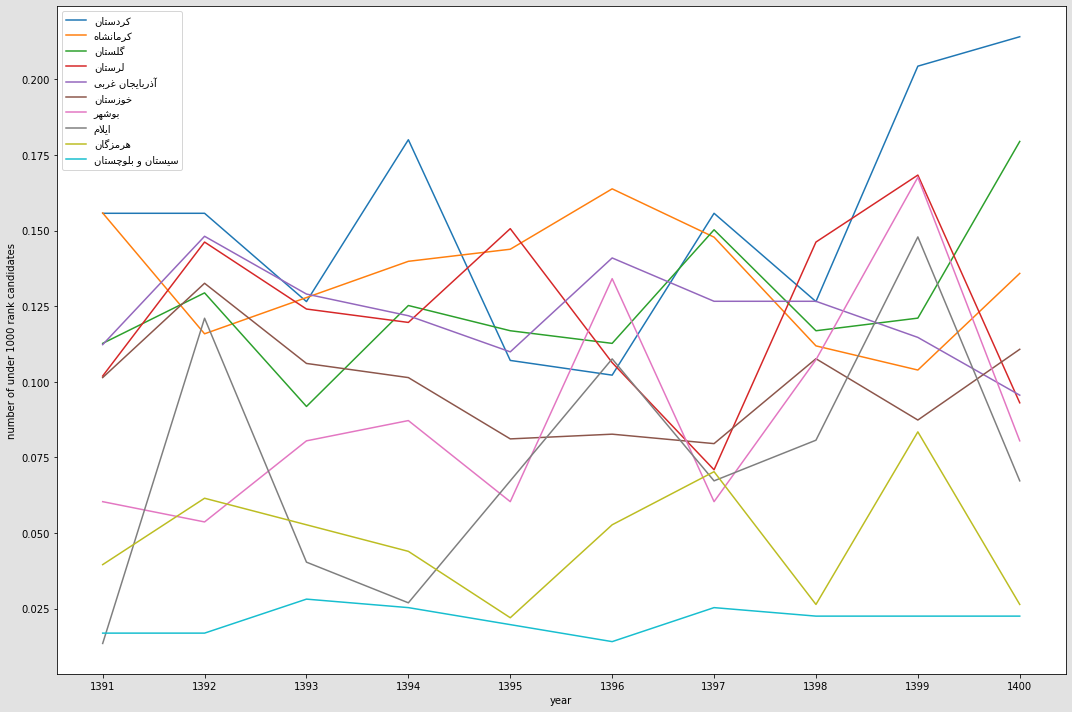

In [20]:

fig,ax = plt.subplots(figsize=(15,10),facecolor = plt.cm.Greys(0.2),tight_layout=True)

#fixing indexes and making some changes such as getting transpose for ease of usage

for index in range(3):
    ax.clear()
    for_mult_line = for_plot
    if index==0:
        for_mult_line = for_mult_line[:11]
    elif index==1:
        for_mult_line = for_mult_line[11:21]
    else:
        for_mult_line = for_mult_line[21:]
    for_mult_line = for_mult_line.T
    for_mult_line.columns = for_mult_line.iloc[0]
    for_mult_line = for_mult_line[1:]
    for_mult_line = for_mult_line.reset_index()
    for_mult_line = for_mult_line.rename(columns={"index":"year"})



    cols = [col for col in for_mult_line.columns if col!="year"]

    for_mult_line["year"] = for_mult_line["year"].astype("int")

    for col in cols:
        #for_mult_line = for_mult_line.sort_values(["year"])
        x = for_mult_line["year"]
        y = for_mult_line[col]
        plt.xticks(x)

        plt.plot(x, y,label=col)
    plt.legend()
    plt.xlabel("year")
    plt.ylabel("number of under 1000 rank candidates")
    plt.savefig("exports\multiple"+str(index)+".png",bbox_inches="tight",dpi=300)


In [21]:
cols = [str(col) for col in range(1391,1401)]

for_heat = for_plot.rename(columns={"استان":"Province"})

for index in range(31):
    for col in cols:
        for_heat.at[index,col] = (for_heat.at[index,col]*700000/dic_population[for_heat.at[index,"Province"]])
for_heat["Province"] = for_heat["Province"].apply(lambda x: get_display(reshape(x)))
for_heat = for_heat.set_index(["Province"])
fig,ax = plt.subplots(figsize=(15,15),facecolor = plt.cm.Greys(0.2),dpi = 150,tight_layout=True)
sns.heatmap(for_heat[cols], cmap="YlGnBu",annot=True);
fig.savefig("exports/heatmap.png",bbox_inches='tight',dpi=300)

KeyError: 'ﯽﻗﺮﺷ ﻥﺎﺠﯾﺎﺑﺭﺫﺁ'

In [45]:
for_plot

,استان,1391,1392,1393,1394,1395,1396,1397,1398,1399,1400
30,ﺩﺰﯾ,0.876918,0.863216,0.965980,0.781005,0.616583,0.568626,0.650838,0.685092,0.534372,0.500117
8,ﯽﺑﻮﻨﺟ ﻥﺎﺳﺍﺮﺧ,0.365198,0.375342,0.507219,0.284043,0.486931,0.395631,0.486931,0.405776,0.497075,0.355054
19,ﻥﺍﺭﺪﻧﺯﺎﻣ,0.425206,0.384824,0.415705,0.470340,0.401452,0.401452,0.382448,0.425206,0.439459,0.346816
3,ﻥﺎﻬﻔﺻﺍ,0.230001,0.351856,0.368611,0.333577,0.281789,0.246756,0.295498,0.301591,0.303114,0.298544
13,ﻥﺎﻨﻤﺳ,0.222108,0.333162,0.388690,0.288741,0.399795,0.266530,0.255425,0.299846,0.244319,0.211003
10,ﯽﻟﺎﻤﺷ ﻥﺎﺳﺍﺮﺧ,0.280156,0.289193,0.325342,0.271118,0.253044,0.207857,0.325342,0.343416,0.343416,0.262081
0,ﯽﻗﺮﺷ ﻥﺎﺠﯾﺎﺑﺭﺫﺁ,0.291279,0.219457,0.289284,0.261353,0.273324,0.225442,0.271328,0.305245,0.321205,0.209482
7,ﻥﺍﺮﻬﺗ,0.189891,0.376254,0.485603,0.453268,0.171666,0.194006,0.120519,0.159908,0.208115,0.248680
9,ﯼﻮﺿﺭ ﻥﺎﺳﺍﺮﺧ,0.200016,0.231533,0.258202,0.289719,0.218199,0.195167,0.261838,0.320025,0.317600,0.256990
12,ﻥﺎﺠﻧﺯ,0.206532,0.221285,0.184404,0.213909,0.213909,0.265542,0.295046,0.309799,0.287670,0.265542


In [47]:
### Lets make color dictionary in order to specify unique color for each province
names = list(for_plot["استان"])
color_dic = {}
for index,name in enumerate(names):
    if index%9 == 0:
        color_dic[name] = "red"
    elif index%9==1:
        color_dic[name]= "purple"
    elif index%9==2:
        color_dic[name]= "blue"
    elif index%9==3:
        color_dic[name]= "green"
    elif index%9==4:
        color_dic[name]= "gray"
    elif index%9==5:
        color_dic[name]= "yellow"
    elif index%9==6:
        color_dic[name]= "cyan"
    elif index%9==7:
        color_dic[name]= "brown"
    else:
        color_dic[name]= "black"

In [48]:
# Creating more rows inorder to have smoother plot animation

for_plot = for_plot.T
for_plot.columns = for_plot.iloc[0]
for_plot = for_plot.reset_index()
for_plot = for_plot.drop(labels=0, axis=0)
del for_plot["index"]

expanded = pd.DataFrame([np.nan]*1600)
for col in for_plot.columns:
    expanded[col] = np.nan
del expanded[0]
j=0
for i in range(1600):
     
    if i%160==0:
        expanded.iloc[i] = for_plot.iloc[j]
        j+=1
for_plot = expanded.interpolate()

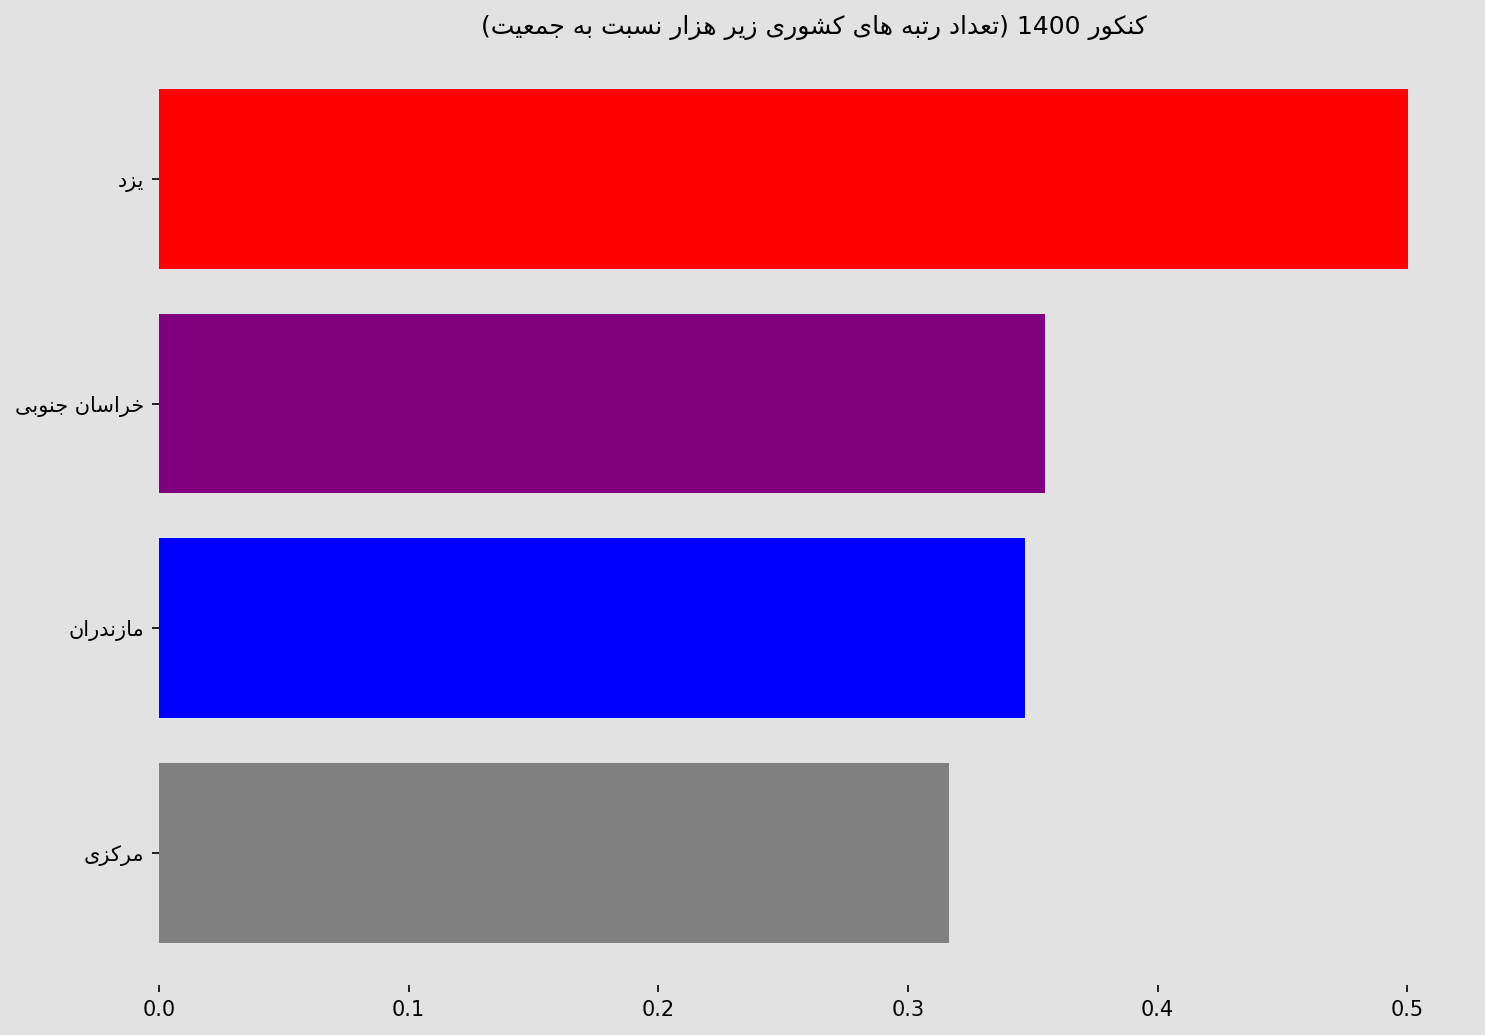

In [49]:
j=0
def create_video():
    def update(i):
        glob = globals()
        ax.clear()
        one_row = for_plot.iloc[i]
        one_row_ascending = one_row.sort_values(ascending=True)
        df_rows = pd.DataFrame(one_row_ascending)
        #top_12 = list(df_rows[19:31].index)
        top_12 = list(df_rows[27:31].index)
        colors = []
        for top in top_12:
            colors.append(color_dic[top])
        one_row = one_row[top_12]
        ax.set_facecolor(plt.cm.Greys(0.2))
        [spine.set_visible(False) for spine in ax.spines.values()]
        hbars = ax.barh(y = one_row.rank(),
               tick_label=one_row.index,
               width = one_row.values,
               height = 0.8,
               color = colors
               )
        
        if i%160==0:
            name = get_display(reshape("کنکور"))
            method = get_display(reshape("(تعداد رتبه های کشوری زیر هزار نسبت به جمعیت)"))
            ax.set_title(method+" "+ f'{1388+glob["j"]} '+name)
            glob["j"]+=1
        else:
            name = get_display(reshape("کنکور"))
            method = get_display(reshape("(تعداد رتبه های کشوری زیر هزار نسبت به جمعیت)"))
            ax.set_title(method+" "+f'{1388+glob["j"]} '+name)

        #ax.bar_label(hbars, fmt='%.2d')
        return hbars


    fig,ax = plt.subplots(figsize=(10,7),
                          facecolor = plt.cm.Greys(0.2),
                          dpi = 150,
                          tight_layout=True
                         )

    data_anime = FuncAnimation(
        fig = fig,
        func = update,
        frames= 1600,
        interval=35,
        blit=True
    )
    return data_anime

anim = create_video()
#writer = matplotlib.animation.ImageMagickFileWriter()
anim.save('new.mp4', writer="ffmpeg")

0